In [1]:
from laser_parallax import compute_world_point
import numpy as np
import matplotlib.pyplot as plt

In [2]:
distances = np.linspace(0.2, 5, 500)

In [3]:
sensor_size_px = np.array([4000, 3000])
pixel_pitch_mm = 0.0015
focal_length_mm = 4.5
laser_origin = np.array([-0.04, -0.11, 0])
laser_axis = np.array([0.0, 0, 1])
laser_axis /= np.linalg.norm(laser_axis)

camera_params = (focal_length_mm, sensor_size_px[0], sensor_size_px[1], pixel_pitch_mm)

In [4]:
plane_normal = np.array([0, 0, 1])
real_image_coordinates = []
quantized_image_coordinates = []
laser_dots = []
errors = []
world_coordinates = []
for distance in distances:
    plane_origin = np.array([0, 0, distance])
    laser_1_scalar = np.dot((plane_origin - laser_origin), plane_normal) / np.dot(laser_axis, plane_normal)
    laser_1_dot = laser_origin + laser_axis * laser_1_scalar
    laser_1_projection = -focal_length_mm / 1e3 / laser_1_dot[2] * laser_1_dot[0:2] / (pixel_pitch_mm / 1e3) # in pixels
    laser_1_projection_q = np.round(laser_1_projection)
    world_coordinate = compute_world_point(
        laser_origin=laser_origin,
        laser_axis=laser_axis,
        camera_params=camera_params,
        image_coordinate=laser_1_projection_q
    )
    error = np.linalg.norm(world_coordinate - laser_1_dot)
    errors.append(error)
    real_image_coordinates.append(laser_1_projection)
    quantized_image_coordinates.append(laser_1_projection_q)
    laser_dots.append(laser_1_dot)
    world_coordinates.append(world_coordinate)

In [5]:
world_coordinates = np.array(world_coordinates)
laser_dots = np.array(laser_dots)


Text(0.5, 1.0, 'Laser Dot in World Coordinates in the XY plane')

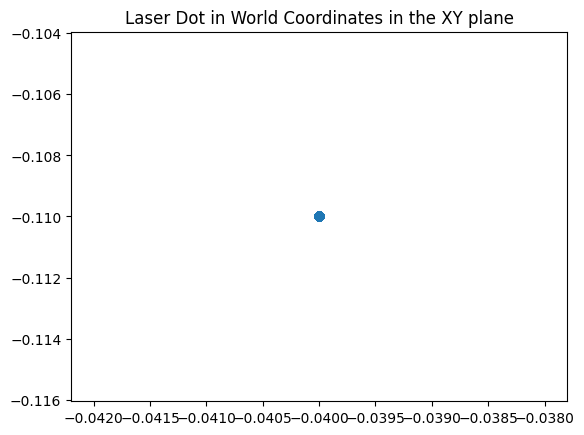

In [6]:
plt.scatter(laser_dots[:,0], laser_dots[:,1])
plt.title('Laser Dot in World Coordinates in the XY plane')

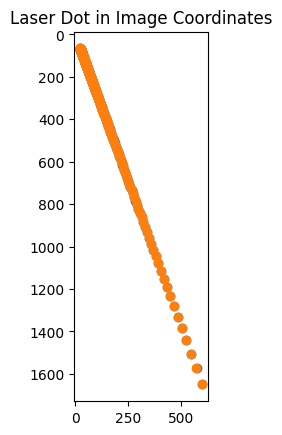

In [7]:
real_image_coordinates = np.array(real_image_coordinates)
quantized_image_coordinates = np.array(quantized_image_coordinates)
plt.scatter(real_image_coordinates[:,0], real_image_coordinates[:,1])
plt.scatter(quantized_image_coordinates[:,0], quantized_image_coordinates[:,1])
plt.gca().set_aspect('equal')
plt.title('Laser Dot in Image Coordinates')
plt.gca().invert_yaxis()

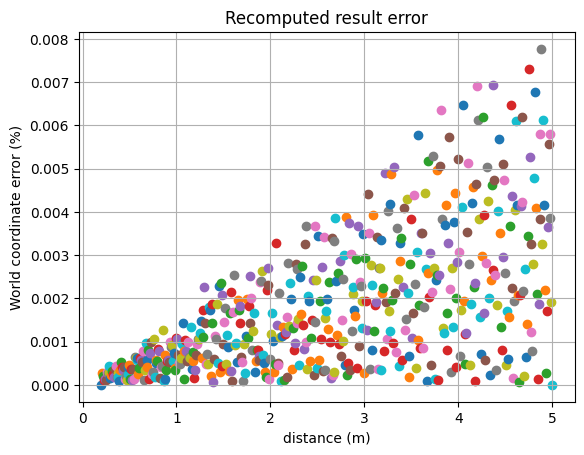

In [8]:
for i, error in enumerate(errors):
    plt.scatter(distances[i], error / distances[i])
plt.title('Recomputed result error')
plt.xlabel('distance (m)')
plt.ylabel('World coordinate error (%)')
plt.grid()

In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# laser_dots = np.array(laser_dots)
# ax.scatter(laser_dots[:,0], laser_dots[:,1], laser_dots[:,2])

Text(0, 0.5, 'Estimated Distance')

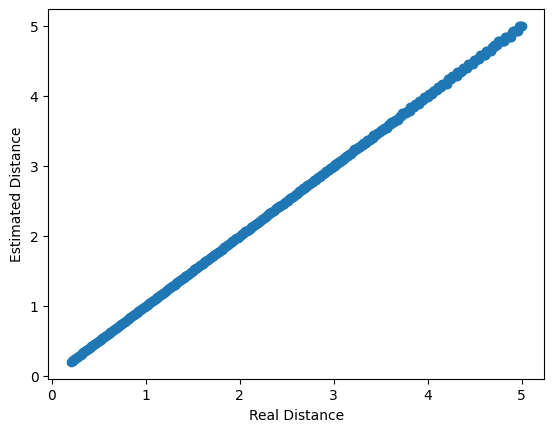

In [10]:
plt.scatter(distances, world_coordinates[:,2])
plt.xlabel("Real Distance")
plt.ylabel('Estimated Distance')

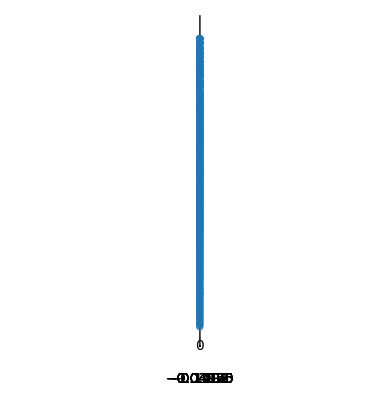

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(world_coordinates[:,0], world_coordinates[:,1], world_coordinates[:,2])
ax.set_aspect('equal')